In [1]:

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading my data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data clean up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

#using the apply method with lambda to get data if not nall values 

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
#using the subplots method do viual more than one graph
fig, ax =plt.subplots()
df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

In [ ]:
#calling the value counts on the job_schedule_type column for the top 3
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

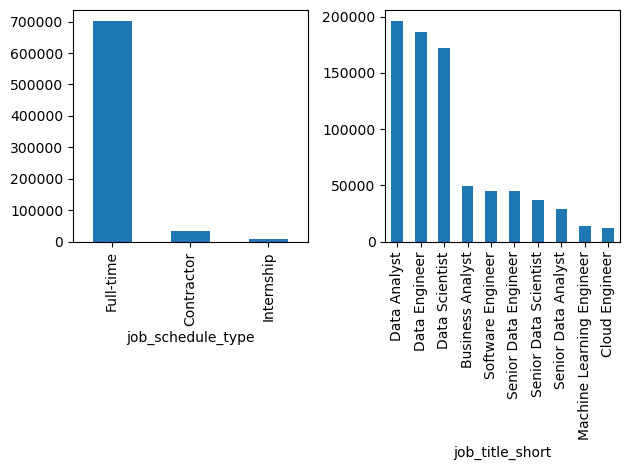

In [14]:
#creating two graphs for two identified columns on value conuts by providing the index of each subplots for each graph
fig, ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax= ax[0])


#tight layoit to fix the overlap numbers

fig.tight_layout()

In [ ]:

df_skills = df.copy()# copying data in new variable 
df_skills = df_skills.explode('job_skills') # exploding ouir data for the job_skills column
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size() # groping for the two selected columns with size
df_skills_count = skills_count.reset_index(name='skill_count') # changing index name 
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True) #sorting the values in descending order also in place.




In [26]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analays'] # creating a list for the job titles we need


In [ ]:
fig, ax = plt.subplots(len(job_titles), 1) # setting up our subplot len job_titles

#filltering our data using a for loop with enumrate method to two be able to insert two values for the skills count on the job_title_short column 
#when its equal to the job_title for the top 5
#creating a plot for our data for the x to be job_skills and the y to be skill_count and we need to provide the i index as it is in a loop/


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
plt.show()
  
 

   

   
    
   
